<a href="https://colab.research.google.com/github/wingated/cs474_labs_f2019/blob/master/Alternate_Labs/DL_Lab1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Getting Started

## Objective  
Get started with Google Colab, Python, and PyTorch. See deep learning in action with TensorFlow playground.

## Deliverable
For this lab, you will submit a Colab notebook (.ipynb) via Learning Suite.

___

### Grading
Your notebook will be graded on the following:
* 50% Part 1: Completed the 10 PyTorch microtasks
* 40% Part 2: Image indicating TensorFlow success
* 10% Tidy and legible figures, (for the future make sure to label axes where appropriate)

___

### Overview of Google Colab
Throughout this class, we recommend you use Google's Colaboratory (Colab) for the labs. If you aren't familiar with Colab or IPython notebooks, take some time to look at the tutorials linked below.

Colab provides an environment that interacts with IPython notebooks (similar to Jupyter) and utilizes a standardized Python distribution.
In addition, Colab provides a GPU we can use for deep learning. We will talk about the advantages of GPU vs CPU training in class.

While you are allowed to do the labs on your own machine, using Jupyter or some other IPython notebook editor, the labs were written and updated for the current Python distribution used by Colab. You may need to do extra troubleshooting to get them working locally. Also, setting up your own GPU for deep learning may be difficult, and training on the CPU may be unbearably slow in later labs.

### Lab Details

This lab is intended to get you used to IPython notebooks, Colab, and a few basic deep learning principles.

As described above, the notebook should do two things:
1.    Complete all 10 microtasks
2.    Display an image that you generate using the Tensorflow playground

For part 1, you will be using the PyTorch documentation to learn how to complete simple tasks. Each task is solvable in one or two lines of code. Links are provided for each microtask to give you a guided introduction to PyTorch.

For part 2, you should visit the [TensorFlow playground](http://playground.tensorflow.org/),
and play with different settings. Most of it will be unfamiliar,
but don't worry – you can't break it!
Once you have a working classifier on the spiral dataset, take a screenshot.
Then use your Colab notebook to display that image in-line.
___

#### Helpful Links

[Google Colab](http://colab.research.google.com/) The site where you will probably be coding the labs

[A Colab notebook teaching you how to use Colab notebooks](https://colab.research.google.com/drive/1TzaPS3jvRadN-URLbQ9nD1ZNoZktfNRy)

[Various Colab tutorials](https://sites.google.com/site/artml2018/tutorials)

___

### Part 1

This is a quick guided walkthrough of PyTorch tensors.

PyTorch is a Python library based on the Torch machine learning framework. While other great deep learning alternatives exist, the labs we use in this course were written exclusively for PyTorch.

#### Tensors

The main PyTorch data structure is the tensor. A tensor in mathematics is a matrix or vector-like structure with more than 2 dimensions, though PyTorch tensors can have 0 or more dimensions. Tensors are implemented similarly to NumPy arrays, and most of what can be done with NumPy can be done with PyTorch tensors. Complete the microtasks in the cells below to learn basic PyTorch tensor manipulation. We provide links to the documentation for this lab, but you should feel comfortable searching the documentation yourself in later labs.

**TODO:**

Complete the Pytorch microtasks

**DONE:**

Completed the Pytorch microtasks


In [2]:
# Import statements for microtasks: Run this cell before running the microtask cells!
import torch
import numpy as np

In [3]:
from torch.cuda import is_available
if torch.cuda.is_available:
  device = torch.device("cuda")

else:
  print("No CUDA available")
  device = torch.device("cpu")

##### Task 1
Tensors are the the lifeblood of PyTorch.<br>
Construct a 5x3 tensor, 'a', of zeros and of dtype long. <br>
https://pytorch.org/docs/stable/generated/torch.zeros.html <br>
(To create tensors of other values, see `torch.ones()` and `torch.full()`)

In [4]:
# Your code here:
a = torch.zeros(5,3).long()
#
# Don't change the following prints and asserts
print(a.size())
assert a.size() == torch.Size([5, 3])
assert type(a[0][0].item()) is int

torch.Size([5, 3])


##### Task 2
Many of your bugs will come from incorrect tensor dimensions. <br>
PyTorch has several built-in functions to give you the control you need. <br>
Using only the tensor's [`.unsqueeze()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.unsqueeze) function, turn 'a' into a 5x1x3 tensor. Hint: use the `dim=` argument

In [5]:
#
a = torch.unsqueeze(a, dim = 1)
#
print(a.shape)
assert a.shape == torch.Size([5, 1, 3])

torch.Size([5, 1, 3])


##### Task 3
Each dimension means something different. <br>
You can change the order of your dimensions without losing information. <br>
Reshape 'a' into a 5x3x1 tensor, using the [`.view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view) function

In [6]:
#
a = a.view(5,3,1)
#
print(a.shape)
assert a.shape == torch.Size([5, 3, 1])

torch.Size([5, 3, 1])


##### Task 4
Dimensions of size 1 can sometimes be necessary for shape matching. <br>
However, they can be removed without losing information. <br>
[`squeeze()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.squeeze) 'a' to remove dimensions of 1.

In [7]:
#
a = torch.squeeze(a)
#
print(a.shape)
assert a.size() == torch.Size([5, 3])

torch.Size([5, 3])


##### Task 5
You can turn any tensor into a tensor of a single dimension. <br>
[`flatten()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.flatten) 'a' to a single dimension.

In [8]:
#
a = torch.flatten(a)
#
print(a.size())
assert  a.size() == torch.Size([15])

torch.Size([15])


##### Task 6
It's easy to integrate other common Python data structures. <br>
Initialize a tensor, 'b', from a list. <br>
Note that the constructor `torch.Tensor()` creates a tensor of a default dtype (float), while the function [`torch.tensor()`](https://pytorch.org/docs/stable/generated/torch.tensor.html#torch.tensor) either uses a specified dtype or determines the type from the data passed in.

In [9]:
my_list = [1,2,3,4,5]
#
b = torch.tensor(my_list, dtype= torch.float32)

#
print(b)
assert b.size() == torch.Size([5])

tensor([1., 2., 3., 4., 5.])


##### Task 7
GPUs will allow tensor operations to run much faster. <br>
Assign 'a' and 'b' to run on GPU. <br>
https://pytorch.org/docs/stable/tensors.html#torch.Tensor.cuda

Note that this will not work if you don't have a cuda-enabled GPU available. You can connect to a machine with a GPU in Colab if you go to Runtime -> Change Runtime Type and set hardware accelerator to GPU, then click save.

In [10]:
#
a = a.to(device)
b = b.to(device)

#
print(a, b)
assert a.is_cuda and b.is_cuda

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0') tensor([1., 2., 3., 4., 5.], device='cuda:0')


##### Task 8
You cannot perform operations on tensors that are on different devices (GPU and CPU), and a tensor on the GPU cannot be converted to a NumPy array or visualized with Matplotlib. <br>
Assign 'a' and 'b' to run on CPU. <br>
https://pytorch.org/docs/stable/tensors.html#torch.Tensor.cpu

In [11]:
#
a = a.cpu()
b = b.cpu()
#
print(a, b)
assert not a.is_cuda and not b.is_cuda

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) tensor([1., 2., 3., 4., 5.])


##### Task 9
You will often want to convert tensors to NumPy arrays to interact with other Python libraries. <br>
Convert 'a' to a NumPy array 'c'. <br>
https://pytorch.org/docs/stable/tensors.html#torch.Tensor.numpy

In [12]:
#
c = a.numpy()
#
print(type(c))
assert type(c) == np.ndarray

<class 'numpy.ndarray'>


##### Task 10
You may often want to convert your NumPy data back into PyTorch. <br>
Convert NumPy array 'c' to tensor 'd'. <br>
https://pytorch.org/docs/stable/generated/torch.from_numpy.html

In [13]:
#
d = torch.from_numpy(c).float()
#
print(d.type())
assert torch.is_tensor(d)

torch.FloatTensor



___

### Part 2

You must play with the Tensorflow playground neural network, and figure out how to create a classifier that successfully classifies the “spiral” dataset. Take a screenshot containing the visualization of the dataset and your classifier, the network architecture, and the hyperparameters of the classifier that learned the spiral dataset.


[TensorFlow playground](http://playground.tensorflow.org/)

**TODO:**
* Create a classifier that successfully classifies the "spiral" dataset
* Display the image below

**DONE:**


Saving 1.jpg to 1.jpg
{'1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00x\x00x\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x03f\x07g\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\

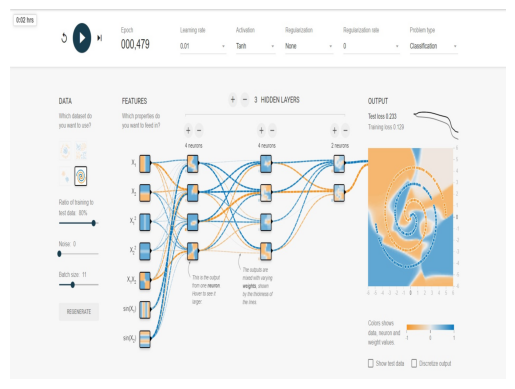

In [14]:
# Run this cell to upload and display your screenshot.
# The results of code cells are saved along with the file, so if you can see the image below, we'll see it too.

import io
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

file_dict = files.upload()
print(file_dict)
image_path = io.BytesIO(file_dict[next(iter(file_dict))])
image = Image.open(image_path)
plt.imshow(image, aspect='auto')
plt.axis('off')
plt.show()